## **Introduction to Titanic Dataset**

On April 15, 1912, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class. In this notebook, we carry an analysis to find out who these people are.

![image info](https://cdn.britannica.com/79/4679-050-BC127236/Titanic.jpg)

## **Data Loading**

Import Data Processing Modules

Tensorflow will be later loaded when we build the model... stay tuned!

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing

Let's load & take a look at the dataset. For each passenger, the following information are provided:

In [2]:
train = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


There are 4 continuous features, 3 categorical features (excluding the target) and 4 descriptive/qualitative features.

**Label (Output) -**
1. Survived

**Continuous features -**
1. Age
2. SibSp
3. Parch
4. Fare

**Categorical features -**
1. Pclass
2. Sex
3. Embarked

**Descriptive features -**
1. PassengerId
2. Name
3. Ticket
4. Cabin

Lets visualise few of the data!

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Survived : 0 (not survived) or 1 (survived) acts as the output & we will be predicting this from the model, by feeding in all the other data as features.

So **'Survived' column -> y_train**

Here not all columns are considered as useful for the prediction.<br>
Eg. Name, PassengerId, Ticket, Cabin & Embarked (might be added to prediction model in future development)

## Exploratory Data Analysis (EDA) -

We are going to use plotly to plot interactive graphs so that we understand the data much better through visualisation.

If this is boring skip to the next heading, you will be good to go! Kudoos!

In [4]:
from plotly.offline import iplot, init_notebook_mode
from plotly.subplots import make_subplots
init_notebook_mode(connected = True)
import plotly.graph_objs as go

**Pie Chart -**

In [5]:
# Define labels & values
labels = ['Survived', 'Not Survived']
sum_values = train["Survived"].value_counts().values.tolist()

# Pie using Graph Objects
trace = go.Pie(labels = labels, values = sum_values)
data = [trace]
fig = go.Figure(data = data)
iplot(fig)

61.6% of the people survived the crash & 38.4% couldn't. We are going to study further more...

**Scatter Plot -**<br>
Let’s find out the relationship between our Age and Fare columns. This would be useful to answer questions like — does older people tend to buy more expensive fare tickets?

In [6]:
#defining data
trace = go.Scatter(x = train['Age'],y=train['Fare'],text = train['Survived'],mode='markers')
data=[trace]
#defining layout
layout = go.Layout(title='Fare Vs Age Scatter Plot',xaxis=dict(title='Age'),yaxis=dict(title='Fare'),hovermode='closest')
#defining figure and plotting
figure = go.Figure(data=data,layout=layout)
iplot(figure)

Observing the plot, we don’t really see a linear relationship between the columns. The Fares tend to hit a price ceiling below 300. We also observe that older people buy cheap fares as well. Besides that, we can’t really tell much simply relying on this plot alone.

We can further investigate this by looking at the Pclass column which is the ticket class for the passengers. By plotting the average age and fare for each Pclass, we can see if there’s something to connect here.

**Bar Chart -**<br>
Let’s plot a Bar Chart showing these information. For each Pclass, we want to display the average age and fare in that Pclass. If you notice, we are starting to deal with multiple variables here, 3 to be exact.

For simplicity’s sake, I will plot the Pclass on the x-axis, average age on the y-axis and the average fare as a color scale in our bar chart. Hence, we will need to compute the average age and fare for each Pclass first.

In [7]:
y=[]
fare = []
for i in list(train['Pclass'].unique()):
    result = train[train['Pclass']==i]['Age'].mean()
    fares = train[train['Pclass']==i]['Fare'].mean()
    y.append(result)
    fare.append(fares)

After that, we can plot our graph.

In [8]:
#defining data
trace = go.Bar(x = list(train['Pclass'].unique()),y=y,marker=dict(color=fare,colorscale='Viridis',showscale=True),text = fare)
data=[trace]
#defining layout
layout = go.Layout(title='Age/Fare vs Pclass Bar Chart',xaxis=dict(title='Pclass'),yaxis=dict(title='Age'),hovermode='closest')
#defining figure and plotting
figure = go.Figure(data=data,layout=layout)
iplot(figure)

Cool. By hovering over the bars, we can see the average Age and Fare for each Pclass, not to mention the clear colour scale defining the fares. The bar chart clearly shows that the age and fares decreases as Pclass increases.

**Distribution Plot**<br>
Distribution Plots are like histograms, but they include another count plot on the bottom to better display the distribution.
We have to import an extra library for distribution plots.

In [9]:
import plotly.figure_factory as ff

Let’s plot 2 graphs, the distribution for age and fares
according to their Pclass separately.

In [10]:
#defining data
b = train[train['Pclass']==2]['Fare']
c = train[train['Pclass']==3]['Fare']
hist_data=[a,b,c]
group_labels=['1','2','3']
#defining fig and plotting
fig = ff.create_distplot(hist_data,group_labels,bin_size=
[1,1,1],show_curve=False)
fig.update_layout(title_text='Distribution for Fares')
iplot(fig)

NameError: name 'a' is not defined

In [11]:
a = train[train['Pclass']==1]['Age']
b = train[train['Pclass']==2]['Age']
c = train[train['Pclass']==3]['Age']
hist_data=[a,b,c]
group_labels=['1','2','3']
fig = ff.create_distplot(hist_data,group_labels,bin_size=[1,1,1],show_curve=False)
fig.update_layout(title_text='Distribution for Age')
iplot(fig)

Both distribution plots clearly shows that the lower Pclass
correlates to a higher age and higher fare. In a layman’s term, it means that the first class tickets cost more, and older people tend to purchase first class tickets.

After concluding that, we want to know how does the survivability relate to these variables. We can plot the survivability against them with the bubble plot. Bubble plots allow visualization up to 4 variables which can help us communicate our point here.

**Bubble Plot**<br>
Bubble Plots are similar to scatter plots, but they have an additional size parameter that defines the radius for each dot.

In [12]:
#defining data
data=[
    go.Scatter(x = train['Age'],y=train['Fare'],
               text=train['Pclass'],
                mode='markers',
               marker=dict(size=train['Pclass']*10, color=train['Survived'],showscale=True),
              )]
#defining layout
layout = go.Layout(title='Fare vs Age with Survivability and Pclass',xaxis=dict(title='Age'),yaxis=dict(title='Fare'),hovermode='closest')
#defining figure and plotting
figure = go.Figure(data=data,layout=layout)
iplot(figure)

From the Bubble Plot, we can see that:

1. Higher Age does not result in Higher Fares
2. All Fares above 50 are considered 1st Class Tickets
3. 1st Class has higher survivability if all other variables are constant
4. Higher Age results in lesser survivability if all other variables are constant

## Data Preprocessing

**Note : Always feed numerical data to your model**


Lets check if our data has any null values


In [13]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Age Column has 177 null values. Using the mean of all the ages these null values can be replaced; since input features cannot be a null value as it deviates our model. Since Cabin is a descriptive feature we dont take that into consideration.

Now we will try to make a **preprocess** function in python to drop few columns which are un-neccessary for the prediction model & convert categorical columns like 'sex' into numerical data.

In [14]:
# Storing the pred_col for future prediction data-frame
pred_col = train.columns.drop('Survived')
pred_col

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [15]:
# Preprocess Function
def preprocess(data, columns_to_drop):
    # Drop the columns
    data = data.drop(columns=columns_to_drop)
    # After this step only 'sex' column has categorical value
    data['Sex'] = data['Sex'].apply(lambda x : 1 if x=='female' else 0)
    data['Embarked'] = data['Embarked'].apply(lambda x : 1 if x=='S' else (2 if x=='C' else 3))
    # Dropping off null-values from the 'Age'
    data = data.fillna(data['Age'].mean())
    return data
to_drop = ['PassengerId','Name', 'Ticket', 'Cabin']    
train = preprocess(train, to_drop)
train.head(10)  

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.000000,1,0,7.2500,1
1,1,1,1,38.000000,1,0,71.2833,2
2,1,3,1,26.000000,0,0,7.9250,1
3,1,1,1,35.000000,1,0,53.1000,1
4,0,3,0,35.000000,0,0,8.0500,1
5,0,3,0,29.699118,0,0,8.4583,3
6,0,1,0,54.000000,0,0,51.8625,1
7,0,3,0,2.000000,3,1,21.0750,1
8,1,3,1,27.000000,0,2,11.1333,1
9,1,2,1,14.000000,1,0,30.0708,2


In [16]:
# Checking if there is any null values
train.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

## Split Train to x_train & y_train
**x_train** => Features to train --> All Features except y_train<br>
**y_train** => Label/Output -----> 'Survived'

In [17]:
# Use pandas.iloc[] to get the specified columns
x_train = train.iloc[:, 1:]
x_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,2
2,3,1,26.0,0,0,7.9250,1
3,1,1,35.0,1,0,53.1000,1
4,3,0,35.0,0,0,8.0500,1


In [18]:
y_train = train.iloc[:, [0]]
y_train.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [19]:
# Shape of x_train & y_train
print('Shape of x_train : ', x_train.shape)
print('Shape of x_train : ', y_train.shape)

Shape of x_train :  (891, 7)
Shape of x_train :  (891, 1)


### Data Scaling


In [20]:
from sklearn.preprocessing import MinMaxScaler # Data Scalling

def scaler(data):
    # Define Feature Column to feed it to th output dataframe
    feature_col = data.columns[0:]
    # Use MinMaxScaler() to scale the values between 0 to 1
    scaler = MinMaxScaler()
    data = scaler.fit_transform(data)
    data = pd.DataFrame(data, columns = feature_col)
    return data

In [21]:
# Scale Model Inputs
x_train = scaler(x_train)
x_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1.0,0.0,0.271174,0.125,0.0,0.014151,0.0
1,0.0,1.0,0.472229,0.125,0.0,0.139136,0.5
2,1.0,1.0,0.321438,0.000,0.0,0.015469,0.0
3,0.0,1.0,0.434531,0.125,0.0,0.103644,0.0
4,1.0,0.0,0.434531,0.000,0.0,0.015713,0.0


## Model Building in Tensorflow

Import Tensorflow API & Functionalities

In [22]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

We are building a 3-layers neural network with TensorFlow. Within a **Sequential** function we are placing **3 Dense** Networks.

**1 & 2 are the hidden layers -**<br>
**1st Dense Network** - 32 Units, Relu Activation & Takes in input dimension<br>
**2nd Dense Network** - 64 Units, Relu Activation<br>

**Output Layer -**<br>
**3rd Dense Network** - 1 Unit, Softmax Activation 

In [23]:
model = Sequential([
    Dense(units=32, activation='relu', input_dim=len(x_train.columns)),
    Dense(units=64, activation='relu'),
    Dense(units=128, activation='relu'),
    Dense(units=1, activation='sigmoid')
])

Compile the model with loss, optimizer & metrics

In [24]:
model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)

## Training the Model

In [25]:
model.fit(x_train, y_train, epochs=500, batch_size=27)

Epoch 1/500
33/33 [==============================] - 1s 3ms/step - loss: 0.5101 - accuracy: 0.7666 - precision: 0.7702 - recall: 0.5585    
Epoch 2/500
33/33 [==============================] - 0s 3ms/step - loss: 0.4445 - accuracy: 0.8047 - precision: 0.8590 - recall: 0.5877
Epoch 3/500
33/33 [==============================] - 0s 3ms/step - loss: 0.4386 - accuracy: 0.8092 - precision: 0.8359 - recall: 0.6257
Epoch 4/500
33/33 [==============================] - 0s 2ms/step - loss: 0.4295 - accuracy: 0.8193 - precision: 0.8494 - recall: 0.6433
Epoch 5/500
33/33 [==============================] - 0s 2ms/step - loss: 0.4350 - accuracy: 0.8148 - precision: 0.8612 - recall: 0.6170
Epoch 6/500
33/33 [==============================] - 0s 2ms/step - loss: 0.4492 - accuracy: 0.8058 - precision: 0.7845 - recall: 0.6813
Epoch 7/500
33/33 [==============================] - 0s 3ms/step - loss: 0.4307 - accuracy: 0.8227 - precision: 0.8538 - recall: 0.6491
Epoch 8/500
33/33 [=========================

We got an accuracy of greater than 89%

## Prediction -<br>
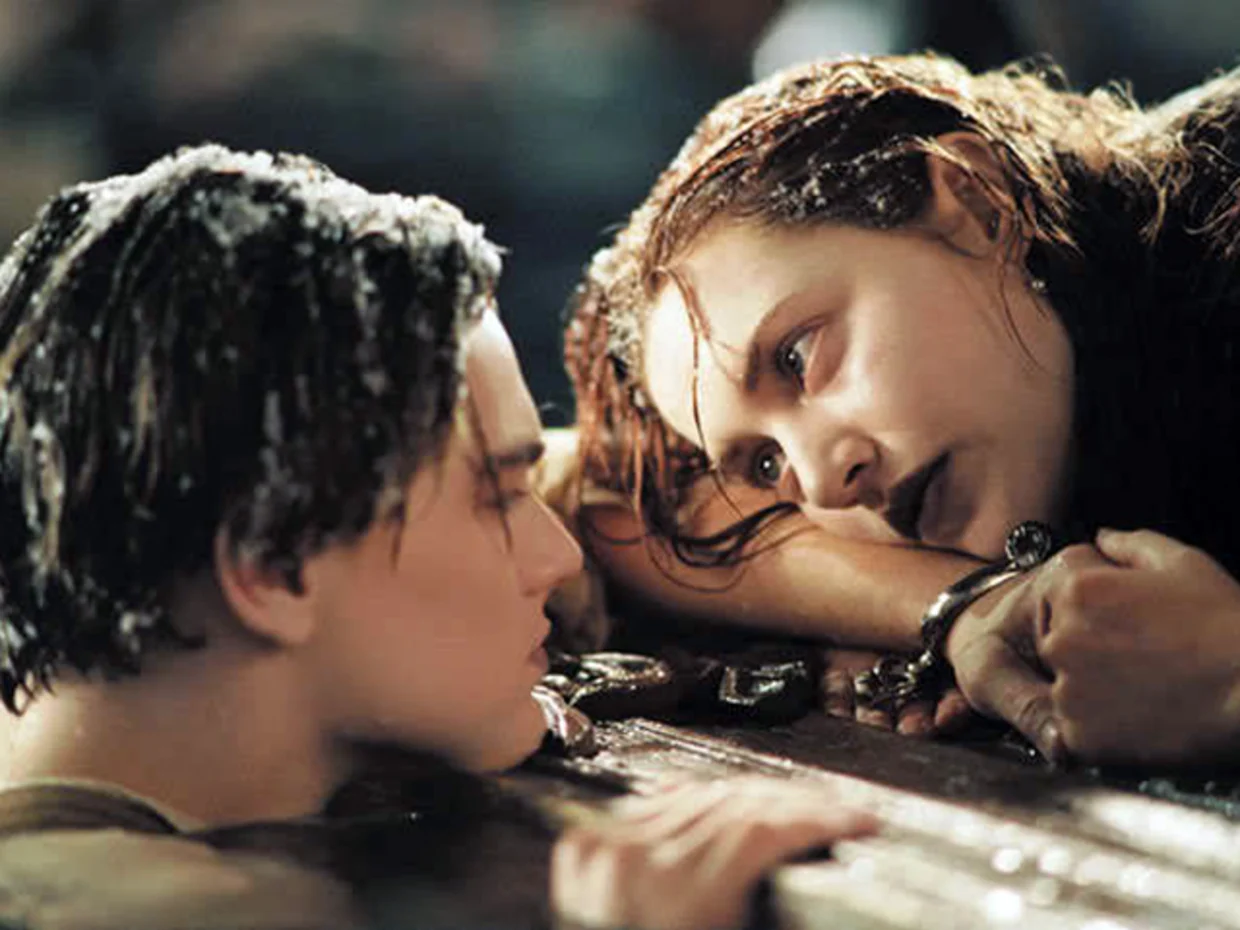

<br>
We are going to predict whether jack & rose survives the titanic crash!!

In [26]:
# Let's create some data for DiCaprio and Winslet
pred_df = pd.DataFrame(columns=pred_col)
jack = [1,3, 'Jack Dawson', 'male', 19, 0, 0, 'N/A', 5.0000, 'N/A', 'N/A']
rose = [2,1, 'Rose DeWitt Bukater', 'female', 17, 1, 2, 'N/A', 100.0000, 'N/A', 'N/A']
pred_df.loc[0] = jack
pred_df.loc[1] = rose
# Preprocess data
pred_df = preprocess(pred_df, to_drop)
# Predict surviving chances (class 1 results)
pred = model.predict(pred_df)
prediction_classes = [
    'Survived' if prob == 1 else 'Not Survived' for prob in np.ravel(pred)
]
print(jack[2], "Surviving Rate :", pred[0], "-->", prediction_classes[0])
print(rose[2], "Surviving Rate :", pred[1], "-->", prediction_classes[1])

1/1 [==============================] - 0s 97ms/step
Jack Dawson Surviving Rate : [0.] --> Not Survived
Rose DeWitt Bukater Surviving Rate : [1.] --> Survived


Our Model proves that Jack's percentage of survival is very less that he will die but Rose's percentage of survival is pretty decent and she lived the crash!!